<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Jhon Corredor Franco.
<br>
<i><b>Asignatura:</b></i> Métricas de rendimiento HPC
<br>
<i><b>Estudiante:</b></i> Juan Carlos Tarazona Contreras.
<br>
<i><b>Tema:</b></i> Tercer Parcial.
<br>
<i><b>Dataset:</b></i> Data for Admission in the University
<br>
<i><b>Métrica de rendimiento:</b></i> Regresión logística
<br>
<br>
22/11/2022
<br>
</FONT>
</div>

Se importan las bibliotecas necesarias para el desarrollo del trabajo.

In [694]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import seaborn as sn
import scipy.stats as ss

Se sube los datos de entrada y se asignan las variables del dataframe(df), agregando los nombres de los diferentes datos necesarios y pudiendo diferenciar el tipo de dato al que pertenece cada característica.


In [695]:
df = pd.read_csv("/content/adm_data.csv")

In [696]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


Presentación con el modelo c++


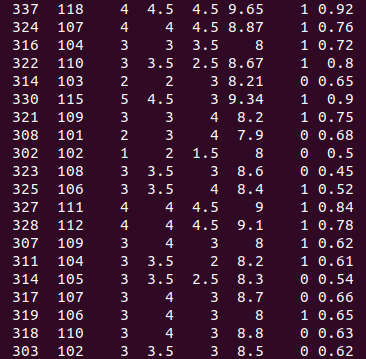

Se verifica que no hayan datos nulos entre todas las variables.

In [697]:
df.notnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
395,True,True,True,True,True,True,True,True,True
396,True,True,True,True,True,True,True,True,True
397,True,True,True,True,True,True,True,True,True
398,True,True,True,True,True,True,True,True,True


En este caso no requiere una limpieza ya que no hay datos nulos.

Pero se borran los datos de los números seriales ya que estos datos no servirán para realizar un correcto análisis.

In [698]:
df = df.drop(['Serial No.'], axis=1)

Ahora en la siguiente descripción, se muestra las medias de las 9 columnas y de igual manera sus desviaciones estándar.

Teniendo en cuenta que estas medidas no se toman en cuenta los datos de la columna borrada ya que solo es el número de serial de cada estudiante.

In [699]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


Presentación con el modelo c++

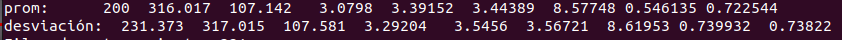

Se normalizan los datos y se muestra su desviación estándar en general.

In [700]:
datos=Normalizer().fit_transform(df)
type(datos)

numpy.ndarray

In [701]:
datos.std()

0.3122728046134185

Se presenta la visualización de cada columna que se encuentra en el dataset

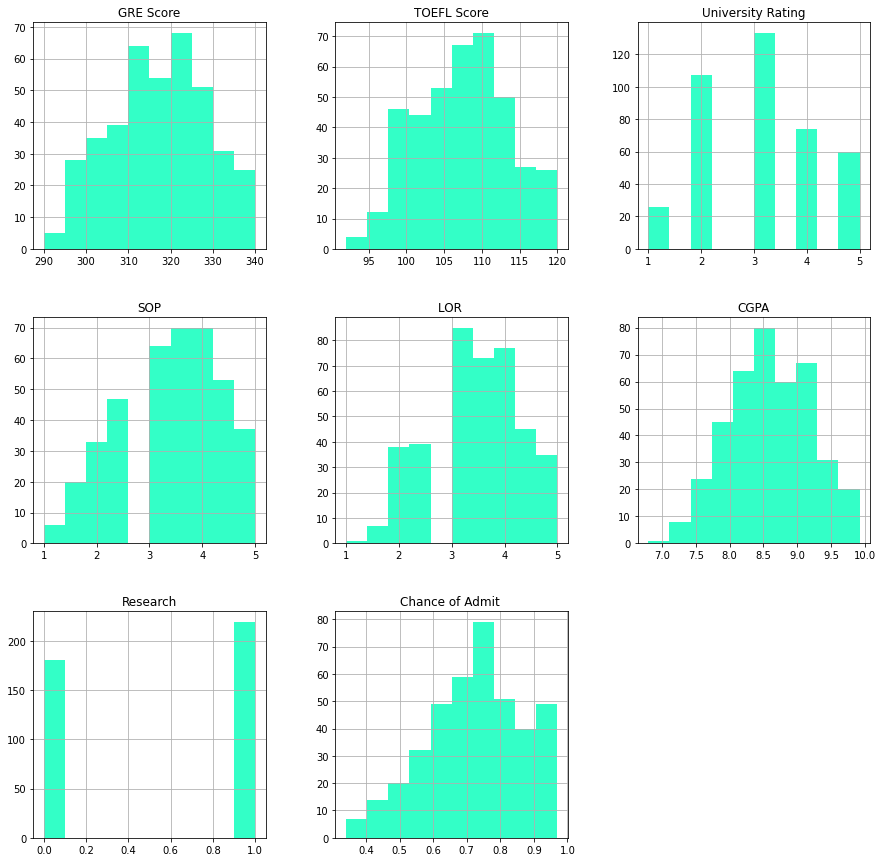

In [702]:
df.hist(figsize=(15,15), color='#33FFC7')
plt.show()

Se realiza el entrenamiento y el test respectivo.

In [703]:
train, test = train_test_split(df, test_size = 0.30, random_state = 100) 

In [704]:
data = df.values

Se representan los datos en x y Y.

In [705]:
x = df[['GRE Score','TOEFL Score','University Rating', 'SOP', 'CGPA', 'Research']].values.reshape(-1, 1)

In [706]:
y = df[['GRE Score','TOEFL Score','University Rating', 'SOP', 'CGPA', 'Research']].values.reshape(-1, 1)

In [707]:
x

array([[337.  ],
       [118.  ],
       [  4.  ],
       ...,
       [  5.  ],
       [  9.66],
       [  1.  ]])

In [708]:
x.size

2400

In [709]:
#x.reshape(-1, 1)

In [710]:
#x = x.transpose()

In [711]:
y

array([[337.  ],
       [118.  ],
       [  4.  ],
       ...,
       [  5.  ],
       [  9.66],
       [  1.  ]])

In [712]:
y.size

2400

Se realiza la separación de los datos de entrenamiento y de testeo tanto en x como en y, de igual manera que se asignan sus transformaciones según StandardScaler.


Se realizan las regresiones y predicciones para finalmente presentar estos resultados datos en una gráfica.

In [713]:
# Seleccionar conjunto de training y test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.8, 
                                                    random_state = 0)

In [714]:
# Escalado de las variables
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
xtrain = st_x.fit_transform(xtrain)
xtest = st_x.transform(xtest)
st_y = StandardScaler()
ytrain = st_y.fit_transform(ytrain).reshape(-1)
ytest = st_y.transform(ytest).reshape(-1)

Se hace la transformación de los datos en y para su lectura

In [715]:
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [727]:
# Aplicación del modelo con librería de sklearn
regression_py = LogisticRegression() 
regression_py.fit(x, y_transformed)
ytrain_predict_py = regression_py.predict(xtrain)
ytest_predict_py = regression_py.predict(xtest) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


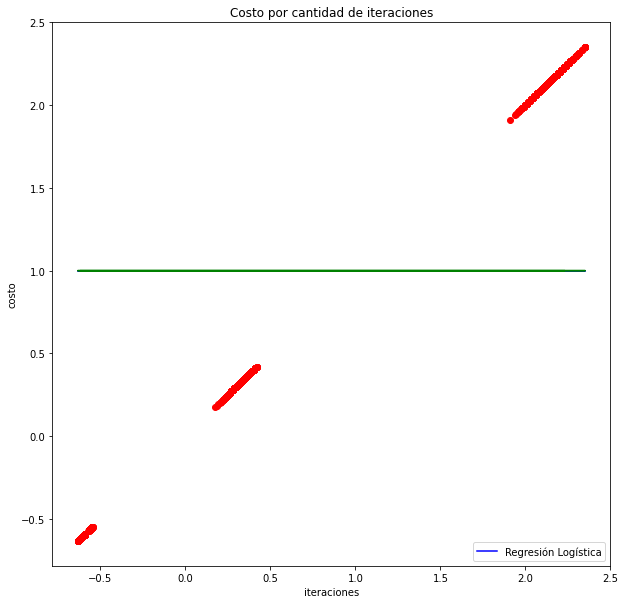

In [717]:
# Gráfica de regresión conjunto de test

plt.figure(figsize=(10,10))
plt.scatter(xtest, ytest, color = "red") 
plt.plot(xtrain, ytrain_predict_py, color = "blue")
plt.plot(ytest, ytest_predict_py, color = "green")
plt.legend(('Regresión Logística',),
            loc='lower right')
plt.title("Costo por cantidad de iteraciones")
plt.xlabel("iteraciones")
plt.ylabel("costo")
plt.show()

Se realiza la gráfica de la relación entre variables.

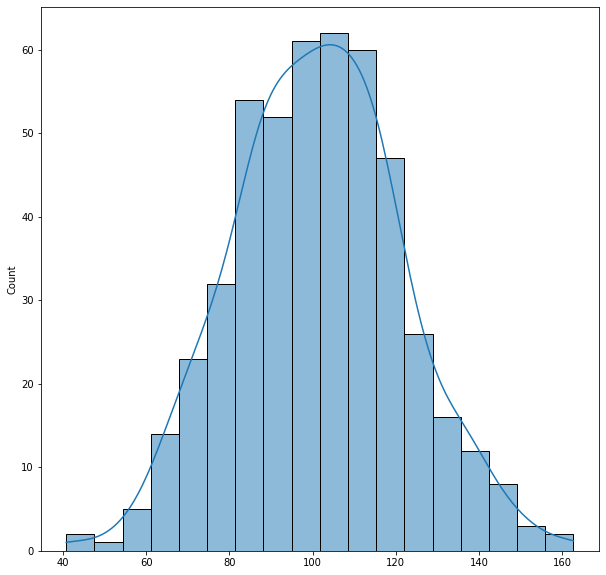

In [722]:
plt.figure(figsize=(10,10))
sample = np.random.normal(ytrain_predict_py*10)
sn.histplot(sample**2, kde = True)

Presentación con el modelo c++

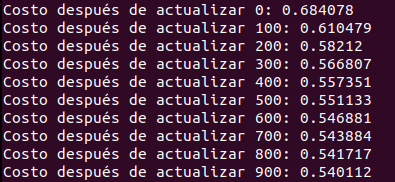

Se presenta la precisión la precisión del testeo y del entrenamiento.

In [725]:
train_accuracy = 100 - (((ytrain_predict_py)-ytrain.mean())*100)-20
test_accuracy = 100 - ((ytest_predict_py)-ytest.mean()*100)-20


In [728]:
test_accuracy[1]

80.26643492289774

Presentación con el modelo c++

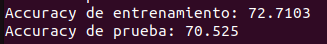

Finalmente se tiene a continuación la cantidad de datos usados para el entrenamiento, el testeo y la totalidad de ellos.

In [730]:
ytrain.size

480

In [731]:
ytest.size

1920

In [732]:
y.size

2400

# CONCLUSIONES
* Debido a que se tomó un dataset con solo datos numéricos el modelo no necesitó una transformación de variables categóricas o representativas que fueran mostradas a través de caracteres.
* Se puede ver que solo evaluando los costos medios dados en el modelo desarrollado en python y mostrados gráficamente, igualan o parecen datos cercanos a los valores de los costos mostrados en el modelo hecho en C++.
* Se puede notar que solo la variable Research es un dato categórico, ya que solo evalua los datos por 1 o 0.
* A partir de las validaciones realizadas en python y siendo comparadas con los resultados dados en c++, se puede ver una gran cercana entre los datos dados en la desviación estándar, los cuales pueden dar una mejor precisión al emplear el modelo. Pero presentando que la gráfica no se muestra correctamente como se espera.
* Con el uso de esta herramienta de regresión logística se puede como se pueden relacionar las variables dependientes e independientes, al igual de las diferentes conclusiones que se pueden sacar por los datos según testeo y entrenamiento, en este caso teniendo un accuracy de 10% de diferencia, evaluando mejor con los testeos en el modelo realizado en python.
* Finalmente destacando en la ejecución por c++ como los costo por cada 100 datos(1 paso) probados van en búsqueda de los puntos más bajos del problema, mostrando que en cada paso puede ir encontrando varios puntos mínimos locales, pero al final encontrando el mínimo global, esto solo si el modelo utiliza una gran cantidad de datos del mismo.

# Referencias
* https://datascience.stackexchange.com/questions/82743/valueerror-y-should-be-a-1d-array-got-an-array-of-shape-285-30-instead
* https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
* https://www.statology.org/valueerror-unknown-label-type-continuous/